In [1]:
import numpy
import pandas
import joblib
import seaborn

%matplotlib inline

# Instructions

- Read **the train data** from the CSV file and properly set the index
- Load the trained model

In [2]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,feature_1,feature_2
id,,
253,2.1592,0.0103
667,-5.1157,0.8180
85,1.8528,-0.0038
969,-6.3364,-1.9423
75,-5.8828,-2.6060
...,...,...
835,2.1841,0.0434
192,-8.5461,-8.3446
629,-7.6355,-6.3077


In [3]:
model = joblib.load('model/model.joblib')
model

KMeans(init='random', n_clusters=3, random_state=0)

# Instructions

- Create a `pandas.DataFrame` with columns `feature_1`, `feature_2`
- Each row represents a point in the feature space lying around the training samples
  - Hint: use the minimum and maximum of `feature_1` and `feature_2`
- These points should form 50$\times$50 evenly spaced grid points
  - Hint: use `numpy.linspace`, `numpy.meshgrid`
- Note that this (approximately) serves as all possible data points in the space
- Use `seaborn.scatterplot` to plot the dataframe of grid points



In [4]:
range_feature_1 = numpy.linspace(data_train['feature_1'].min(), data_train['feature_1'].max(), 50)
range_feature_2 = numpy.linspace(data_train['feature_2'].min(), data_train['feature_2'].max(), 50)

features = numpy.meshgrid(range_feature_1, range_feature_2)

data_meshgrid = pandas.DataFrame({
    'feature_1': features[0].reshape(-1), 
    'feature_2': features[1].reshape(-1),
})
data_meshgrid

,feature_1,feature_2
0,-12.624300,-8.3446
1,-12.301120,-8.3446
2,-11.977941,-8.3446
3,-11.654761,-8.3446
4,-11.331582,-8.3446
...,...,...
2495,1.918782,6.0985
2496,2.241961,6.0985
2497,2.565141,6.0985
2498,2.888320,6.0985


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='feature_1', ylabel='feature_2'>

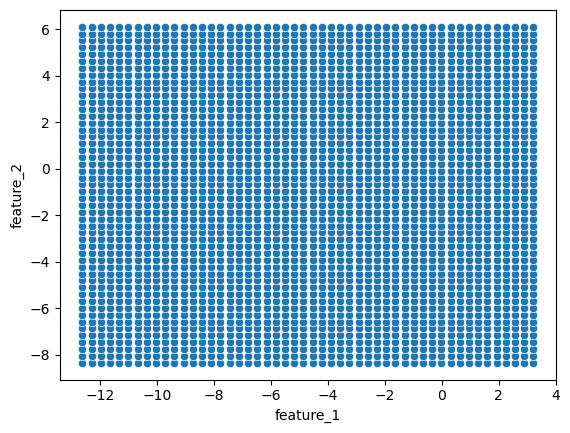

In [5]:
seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
)

# Instructions

- Describe how grid points can be used to contruct the cluster boundary
- Describe what the cluster boundary should look like 
- Now, add a `prediction` column to the dataframe of grid points

In [6]:
data_meshgrid['prediction']  = model.predict(data_meshgrid[['feature_1', 'feature_2']])
data_meshgrid

,feature_1,feature_2,prediction
0,-12.624300,-8.3446,1
1,-12.301120,-8.3446,1
2,-11.977941,-8.3446,1
3,-11.654761,-8.3446,1
4,-11.331582,-8.3446,1
...,...,...,...
2495,1.918782,6.0985,2
2496,2.241961,6.0985,2
2497,2.565141,6.0985,2
2498,2.888320,6.0985,2


# Instructions

- Plot a hard cluster boundary using `prediction`
  - Hint: use `prediction` as `hue`
- Export the cluster boundary to `./results/cluster_boundary.png`
- Plot the cluster boundary and overlay training samples on it


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


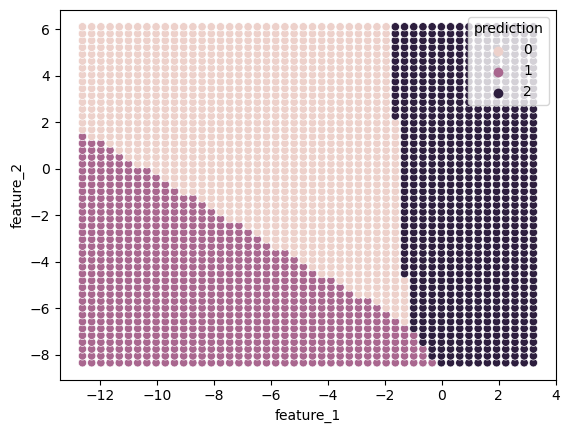

In [7]:
axis = seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
    hue = 'prediction',
)


In [8]:
figure = axis.get_figure()
figure.savefig("./results/cluster_boundary.png")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='feature_1', ylabel='feature_2'>

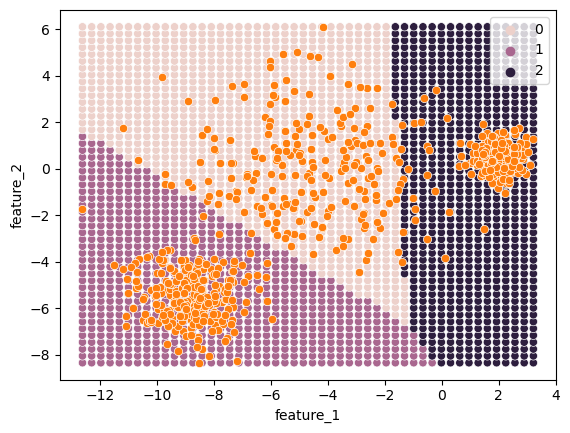

In [9]:
seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
    hue = 'prediction',
)

seaborn.scatterplot(
    data_train,
    x   = 'feature_1',
    y   = 'feature_2',
)